In [ ]:
# 导入全部所需的包
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.ticker as mtick # For specifying the axes tick format 
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.feature_selection import f_classif
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_noLabel.csv')
# 探索性数据分析
# 数据统计和可视化分析
# 设置查看列不省略
pd.set_option('display.max_columns',None)
# 查看前10行数据
train.head(10)

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure,Label
0,0,One year,No,No internet service,No,24.150000,Yes,Yes,Bank transfer (automatic),Yes,0,No internet service,1505.900000,Male,60,No
1,1,Month-to-month,No,No,Fiber optic,76.142284,Yes,No,Electronic check,Yes,0,No,946.581518,Female,12,Yes
2,2,Month-to-month,Yes,No internet service,No,26.200000,Yes,Yes,Electronic check,Yes,0,No internet service,1077.500000,Female,40,No
3,3,Two year,Yes,No internet service,No,24.650000,Yes,Yes,Bank transfer (automatic),Yes,0,No internet service,1138.800000,Female,45,No
4,4,Month-to-month,Yes,No internet service,No,19.150000,No,Yes,Mailed check,Yes,0,No internet service,477.600000,Male,25,No
5,5,Month-to-month,No,No,Fiber optic,105.000000,No,No,Mailed check,Yes,1,Yes,2007.250000,Female,19,No
6,6,Two year,No,No,DSL,61.350000,No,Yes,Mailed check,Yes,0,No,3766.200000,Male,60,No
7,7,Month-to-month,No,No,Fiber optic,53.664919,Yes,No,Electronic check,Yes,0,Yes,1857.508050,Male,36,No
8,8,Month-to-month,No,No,DSL,51.388635,No,No,Electronic check,Yes,0,No,51.388635,Female,1,Yes
9,9,Two year,No,No,Fiber optic,79.200000,Yes,No,Credit card (automatic),Yes,1,No,4590.350000,Female,59,No


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test.head(10)

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure
0,5227,Two year,Yes,Yes,Fiber optic,112.25,Yes,Yes,Bank transfer (automatic),Yes,0,Yes,8041.65,Male,72
1,5228,Month-to-month,No,No,DSL,45.10,No,No,Bank transfer (automatic),Yes,0,No,45.10,Male,1
2,5229,One year,No,No,DSL,59.10,No,No,Credit card (automatic),Yes,0,No,772.85,Female,14
3,5230,Month-to-month,No,No internet service,No,19.65,No,No,Mailed check,Yes,0,No internet service,19.65,Male,1
4,5231,Two year,No,No internet service,No,19.25,No,Yes,Mailed check,Yes,0,No internet service,855.10,Male,48
5,5232,Two year,No,Yes,DSL,69.85,No,No,Bank transfer (automatic),Yes,1,Yes,4003.00,Female,57
6,5233,Month-to-month,No,No internet service,No,19.85,No,No,Mailed check,Yes,0,No internet service,63.75,Female,3
7,5234,One year,No,Yes,Fiber optic,102.85,Yes,No,Credit card (automatic),Yes,1,Yes,6976.75,Female,66
8,5235,Two year,Yes,Yes,Fiber optic,110.80,Yes,Yes,Credit card (automatic),Yes,0,Yes,7245.90,Female,65
9,5236,Month-to-month,No,No internet service,No,20.25,No,No,Mailed check,Yes,0,No internet service,20.25,Female,1


In [ ]:
# 查看数据集大小
train.shape

(5227, 16)

In [ ]:
test.shape

(1307, 15)

In [ ]:
# Null计数
pd.isnull(train).sum()

ID                  0
Contract            0
Dependents          0
DeviceProtection    0
InternetService     0
MonthlyCharges      0
MultipleLines       0
Partner             0
PaymentMethod       0
PhoneService        0
SeniorCitizen       0
TVProgram           0
TotalCharges        0
gender              0
tenure              0
Label               0
dtype: int64

In [ ]:
# 描述性统计
train.describe(include='all')

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure,Label
count,5227.000000,5227,5227,5227,5227,5227.000000,5227,5227,5227,5227,5227.000000,5227,5227.000000,5227,5227.000000,5227
unique,NaN,3,2,3,3,NaN,3,2,4,2,NaN,3,NaN,2,NaN,2
top,NaN,Month-to-month,No,No,Fiber optic,NaN,No,No,Electronic check,Yes,NaN,No,NaN,Female,NaN,No
freq,NaN,3386,4049,2777,2803,NaN,2542,3014,2517,4857,NaN,2292,NaN,2650,NaN,3280
mean,2613.000000,NaN,NaN,NaN,NaN,66.823765,NaN,NaN,NaN,NaN,0.118615,NaN,2084.477153,NaN,28.775971,NaN
std,1509.049259,NaN,NaN,NaN,NaN,28.862749,NaN,NaN,NaN,NaN,0.323366,NaN,2183.825066,NaN,24.293077,NaN
min,0.000000,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,NaN,NaN,0.000000,NaN,18.800000,NaN,0.000000,NaN
25%,1306.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,0.000000,NaN,292.979609,NaN,5.000000,NaN
50%,2613.000000,NaN,NaN,NaN,NaN,74.200000,NaN,NaN,NaN,NaN,0.000000,NaN,1218.650000,NaN,23.000000,NaN
75%,3919.500000,NaN,NaN,NaN,NaN,89.900000,NaN,NaN,NaN,NaN,0.000000,NaN,3373.825000,NaN,51.000000,NaN


In [ ]:
# 查看数据类型
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5227 non-null   int64  
 1   Contract          5227 non-null   object 
 2   Dependents        5227 non-null   object 
 3   DeviceProtection  5227 non-null   object 
 4   InternetService   5227 non-null   object 
 5   MonthlyCharges    5227 non-null   float64
 6   MultipleLines     5227 non-null   object 
 7   Partner           5227 non-null   object 
 8   PaymentMethod     5227 non-null   object 
 9   PhoneService      5227 non-null   object 
 10  SeniorCitizen     5227 non-null   int64  
 11  TVProgram         5227 non-null   object 
 12  TotalCharges      5227 non-null   float64
 13  gender            5227 non-null   object 
 14  tenure            5227 non-null   int64  
 15  Label             5227 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory

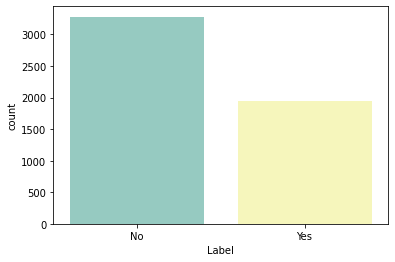

In [ ]:
# 检查数据是否平衡
sns.countplot(x='Label', data=train, order=['No', 'Yes'],palette='Set3')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text

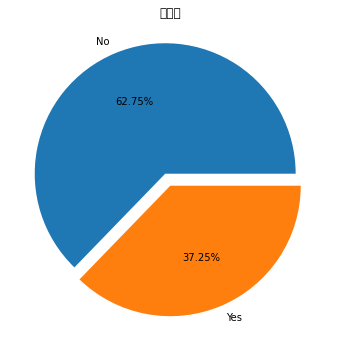

In [ ]:
# 饼图检查客户流失率
#用来正常显示中文标签
plt.rcParams['font.sans-serif'] =['Heiti TC'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['figure.figsize']=6,6 # 设置图像大小
plt.pie(train['Label'].value_counts(),labels=train['Label'].value_counts().index,autopct='%1.2f%%',explode=(0.1,0))
plt.title('流失率')
plt.show()

In [ ]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# 创建子图：对饼图子图使用“域”类型
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=train['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=train['Label'].value_counts(), name="Churn"),
              1, 2)
# 创建圆环饼图
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)
fig.update_layout(
    title_text="Gender and Churn Distributions",
    # 在中心添加注释
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
train["Label"][train["Label"]=="No"].groupby(by=train["gender"]).count()


gender
Female    1647
Male      1633
Name: Label, dtype: int64

In [ ]:
train["Label"][train["Label"]=="Yes"].groupby(by=train["gender"]).count()

gender
Female    1003
Male       944
Name: Label, dtype: int64

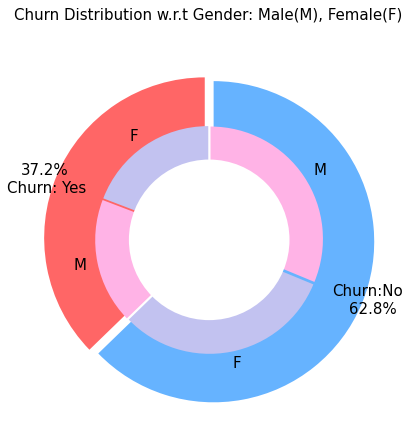

In [ ]:
#录入统计量
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1947,3280]
labels_gender = ["F","M","F","M"]
sizes_gender = [1003,944 , 1647,1633]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#画图
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
def barplot_percentages(df,feature):
  color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
  fig = px.histogram(train, x="Label", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
  fig.update_layout(width=700, height=500, bargap=0.1)
  fig.show()

In [ ]:
#百分比直方图函数
def barplot_percentages(df,feature):
  colors = ['#4D3425','#E4512B']
  g_churn = train.groupby([feature,'Label']).size().unstack()
  ax = (g_churn.T*100.0 / g_churn.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True, rot = 0,figsize = (8,6),color = colors)
  ax.yaxis.set_major_formatter(mtick.PercentFormatter())
  ax.legend(loc='center',prop={'size':14},title = 'Churn')
  ax.set_ylabel('% Customers')
  ax.set_title(feature,size = 14)
  # Code to add the data labels on the stacked bar chart
  for p in ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                  color = 'white',
                weight = 'bold',size =14)

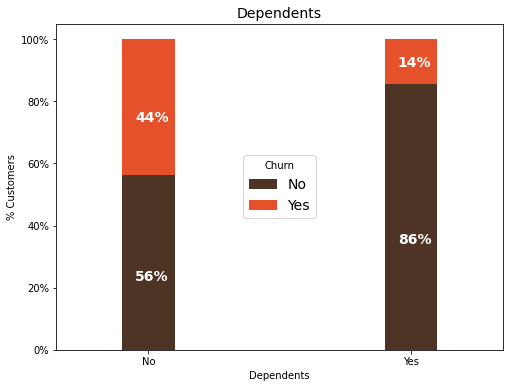

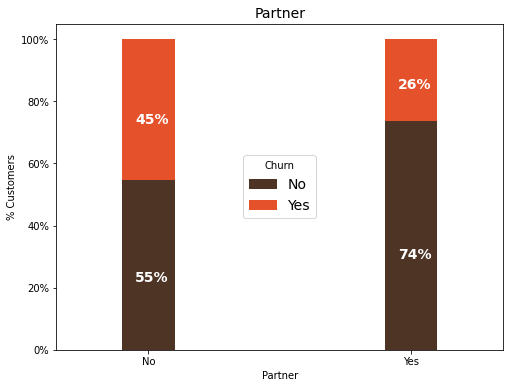

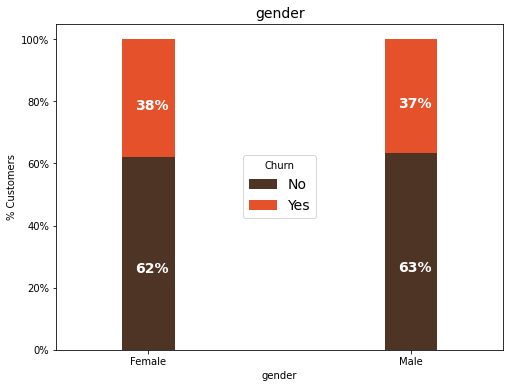

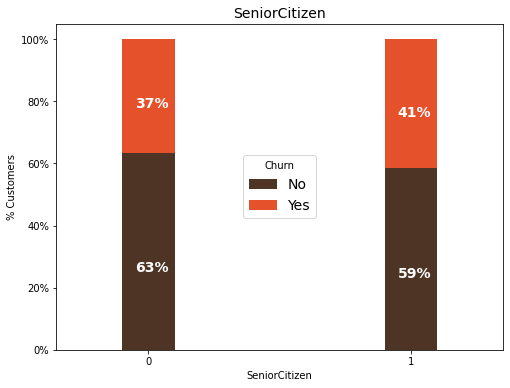

In [ ]:
userProfile=train[['Dependents','Partner','gender','SeniorCitizen','Label']]
barplot_percentages(userProfile,'Dependents')
barplot_percentages(userProfile,'Partner')
barplot_percentages(userProfile,'gender')
barplot_percentages(userProfile,'SeniorCitizen')

In [ ]:
# # 将直方图频数转为百分比
# def barplot_percentages(df,feature):
#     g=df.groupby(by=feature)['Label'].value_counts(1).to_frame()
#     g.rename(columns={'Label':'percentage'},inplace=True)
#     g.reset_index(inplace=True)
#     ax=sns.barplot(x=feature,y='percentage', hue='Label', data=g)
#     ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
#     plt.show()


In [ ]:
fig = px.histogram(train, x="Label", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()
labels = train['PaymentMethod'].unique()
values = train['PaymentMethod'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()
fig = px.histogram(train, x="Label", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(train, x="Label", color="DeviceProtection", barmode="group")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(train, x="Label", color="InternetService", barmode="group")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(train, x="Label", color="TVProgram", barmode="group")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(train, x="Label", color="MultipleLines", barmode="group")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(train, x="Label", color="PhoneService", barmode="group")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
# 单一特征分析
# 查看分类特征中具体有哪些分类
for col in list(train.columns):
    if type(train[col].unique()[0]) is str:
        print(col,train[col].unique()) # 显示所有的唯一值

Contract ['One year' 'Month-to-month' 'Two year']
Dependents ['No' 'Yes']
DeviceProtection ['No internet service' 'No' 'Yes']
InternetService ['No' 'Fiber optic' 'DSL']
MultipleLines ['Yes' 'No' 'No phone service']
Partner ['Yes' 'No']
PaymentMethod ['Bank transfer (automatic)' 'Electronic check' 'Mailed check'
 'Credit card (automatic)']
PhoneService ['Yes' 'No']
TVProgram ['No internet service' 'No' 'Yes']
gender ['Male' 'Female']
Label ['No' 'Yes']


In [ ]:
# 客户属性维度分析
userProfile=train[['Dependents','Partner','gender','SeniorCitizen','Label']]
barplot_percentages(userProfile,'Dependents')
barplot_percentages(userProfile,'Partner')
barplot_percentages(userProfile,'gender')
barplot_percentages(userProfile,'SeniorCitizen')


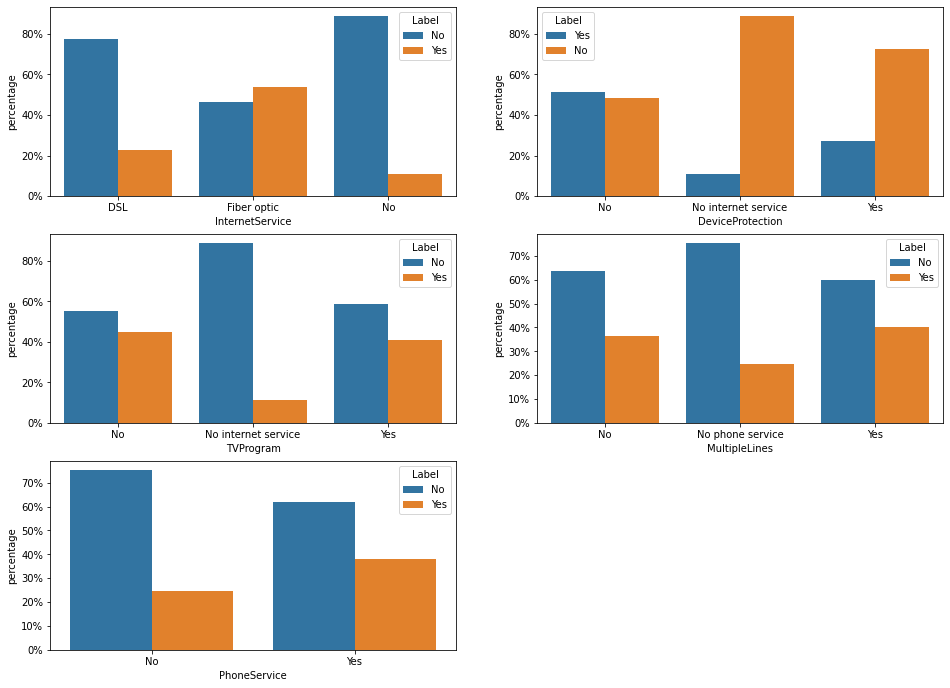

In [ ]:
# 服务属性纬度分析(离散型类别)
userUsageFeatures=train[['InternetService','DeviceProtection','TVProgram','MultipleLines','PhoneService','Label']]
def multi_barplot_percentages(df,features):
    plt.figure(figsize=(16,16))
    fig=plt.subplot()
    cnt=0
    for feature in features:
        g=df.groupby(by=feature)['Label'].value_counts(1).to_frame()
        g.rename(columns={'Label':'percentage'},inplace=True)
        g.reset_index(inplace=True)
        
        plt.subplot(421+cnt) # 划分窗口为3行2列
        ax=sns.barplot(x=feature,y='percentage', hue='Label', data=g)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        cnt+=1
    plt.show()
multi_barplot_percentages(userUsageFeatures,['InternetService','DeviceProtection','TVProgram','MultipleLines','PhoneService'])


In [ ]:
# 客户消费行为分析
userPaymentFeatures=train[['Contract','PaymentMethod','TotalCharges','MonthlyCharges','tenure','Label']]

In [ ]:
# barplot_percentages(userPaymentFeatures,'Contract')
# plt.figure(figsize=(11,5))
# barplot_percentages(userPaymentFeatures,'PaymentMethod')

In [ ]:
# # 对tenure任期年数，划分成不同年龄段进行画图
# userPaymentFeatures['tenureCut']=pd.cut(userPaymentFeatures.tenure,bins=[0,20,40,60,80])
# # userPaymentFeatures.drop(columns=['tenure'],inplace=True) # inplace=true表示原地操作
# userPaymentFeatures.head()
# barplot_percentages(userPaymentFeatures,'tenureCut')

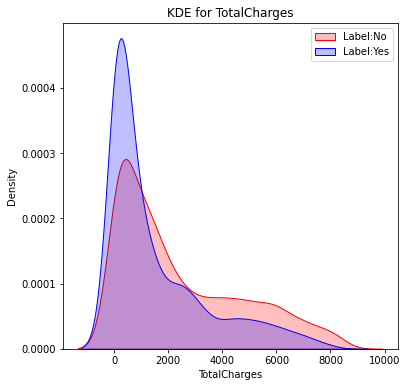

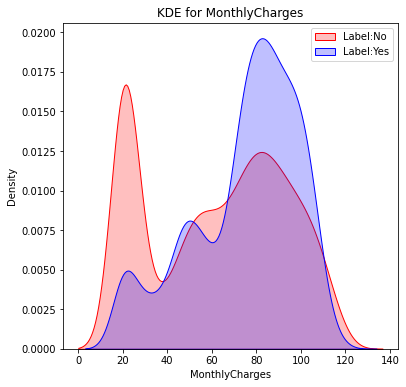

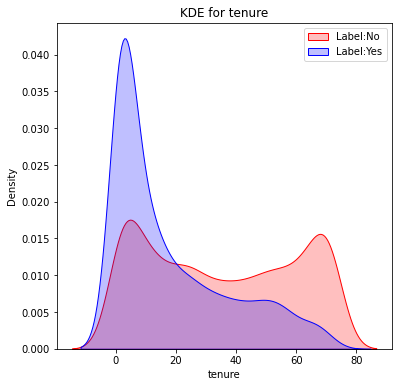

In [ ]:
# 对数值型特征采用核密度函数进行绘图分析
userPaymentFeatures=train[['Contract','PaymentMethod','TotalCharges','MonthlyCharges','tenure','Label']]
def kdeplot(df,feature):
    ax1=sns.kdeplot(df[df['Label']=='No'][feature],label='Label:No',color="red",shade="true")
    ax1=sns.kdeplot(df[df['Label']=='Yes'][feature],label='Label:Yes',color="blue",shade="true")
    plt.title('KDE for {}'.format(feature))
    plt.legend()
    plt.show()
kdeplot(userPaymentFeatures,'TotalCharges')
kdeplot(userPaymentFeatures,'MonthlyCharges')
kdeplot(userPaymentFeatures,'tenure')

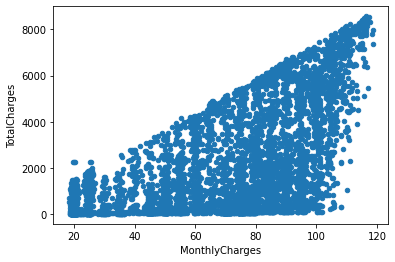

In [ ]:
train[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y='TotalCharges')

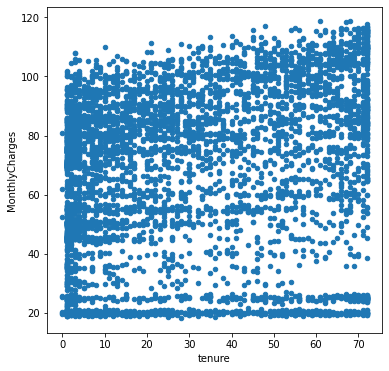

In [ ]:
train[['tenure', 'MonthlyCharges']].plot.scatter(x = 'tenure', y='MonthlyCharges')

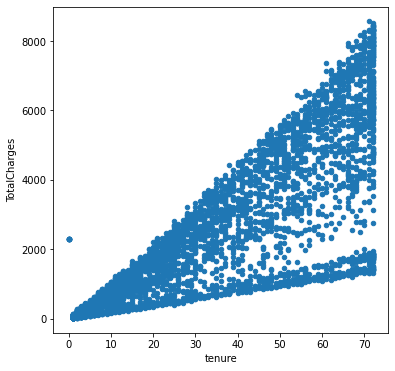

In [ ]:
train[['tenure', 'TotalCharges']].plot.scatter(x = 'tenure', y='TotalCharges')

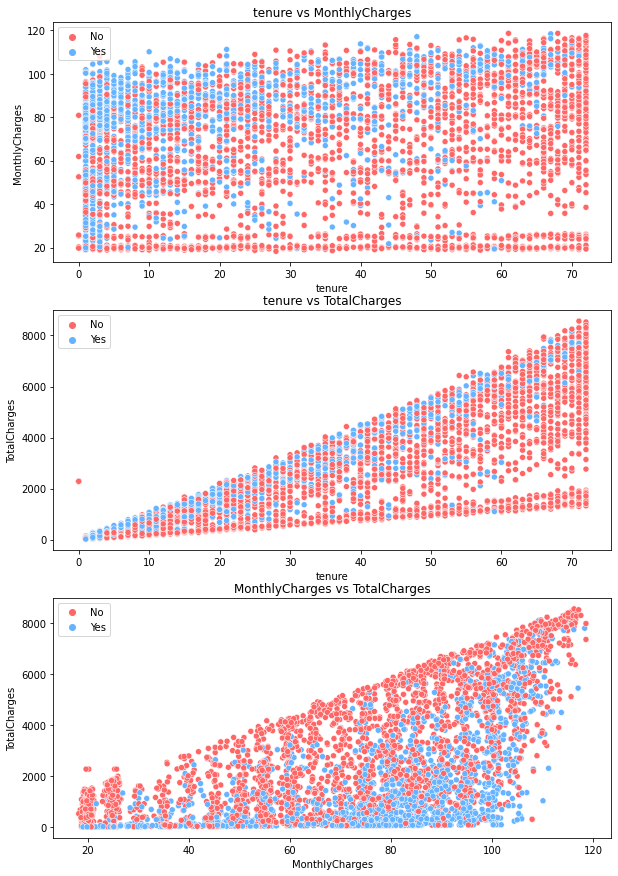

In [ ]:
#查看数值特征俩俩之间关系
numerical_features=['tenure', 'MonthlyCharges', 'TotalCharges']
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (10,15))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = train,hue = 'Label',palette = colors);
            plt.legend()
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

In [ ]:
mms = MinMaxScaler() # Normalization

train['tenure'] = mms.fit_transform(train[['tenure']])
train['MonthlyCharges'] = mms.fit_transform(train[['MonthlyCharges']])
train['TotalCharges'] = mms.fit_transform(train[['TotalCharges']])
train.head()

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure,Label
0,0,One year,No,No internet service,No,0.058794,Yes,Yes,Bank transfer (automatic),Yes,0,No internet service,0.174012,Male,0.833333,No
1,1,Month-to-month,No,No,Fiber optic,0.576904,Yes,No,Electronic check,Yes,0,No,0.108564,Female,0.166667,Yes
2,2,Month-to-month,Yes,No internet service,No,0.079223,Yes,Yes,Electronic check,Yes,0,No internet service,0.123883,Female,0.555556,No
3,3,Two year,Yes,No internet service,No,0.063777,Yes,Yes,Bank transfer (automatic),Yes,0,No internet service,0.131056,Female,0.625000,No
4,4,Month-to-month,Yes,No internet service,No,0.008969,No,Yes,Mailed check,Yes,0,No internet service,0.053686,Male,0.347222,No


In [ ]:
#对分类数据进行编码，转换为数值数据
le=LabelEncoder()
data=train.copy(deep=True)
text_data_features=[i for i in list(train.columns) if i not in list(train.describe().columns)]
print('编码数据一览')
for i in text_data_features:
    data[i]=le.fit_transform(data[i])
    print(i,': ',data[i].unique(),' = ',le.inverse_transform(data[i].unique()))

编码数据一览
Contract :  [1 0 2]  =  ['One year' 'Month-to-month' 'Two year']
Dependents :  [0 1]  =  ['No' 'Yes']
DeviceProtection :  [1 0 2]  =  ['No internet service' 'No' 'Yes']
InternetService :  [2 1 0]  =  ['No' 'Fiber optic' 'DSL']
MultipleLines :  [2 0 1]  =  ['Yes' 'No' 'No phone service']
Partner :  [1 0]  =  ['Yes' 'No']
PaymentMethod :  [0 2 3 1]  =  ['Bank transfer (automatic)' 'Electronic check' 'Mailed check'
 'Credit card (automatic)']
PhoneService :  [1 0]  =  ['Yes' 'No']
TVProgram :  [1 0 2]  =  ['No internet service' 'No' 'Yes']
gender :  [1 0]  =  ['Male' 'Female']
Label :  [0 1]  =  ['No' 'Yes']


In [ ]:
data

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure,Label
0,0,1,0,1,2,0.058794,2,1,0,1,0,1,0.174012,1,0.833333,0
1,1,0,0,0,1,0.576904,2,0,2,1,0,0,0.108564,0,0.166667,1
2,2,0,1,1,2,0.079223,2,1,2,1,0,1,0.123883,0,0.555556,0
3,3,2,1,1,2,0.063777,2,1,0,1,0,1,0.131056,0,0.625000,0
4,4,0,1,1,2,0.008969,0,1,3,1,0,1,0.053686,1,0.347222,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5222,5222,1,0,1,2,0.024913,0,1,2,1,1,1,0.054576,1,0.319444,0
5223,5223,0,0,1,2,0.016442,0,0,3,1,0,1,0.000129,0,0.013889,1
5224,5224,2,1,2,1,0.931739,2,1,1,1,0,2,0.876731,0,0.944444,0
5225,5225,1,1,2,0,0.598904,2,1,1,1,0,2,0.373557,0,0.569444,0


In [ ]:
# 特征相关性分析
# 上述特征中，可能具有相关性的特征有：家属Dependents、配偶Partner、任期年数tenure(int64)、互联网服务InternetService、设备保护DeviceProtection、电视节目TVProgram、合同Contract、付款方式PaymentMethod、总费用TotalCharges(float64)、月费用MonthlyCharges(float64)
# 其余：id和label肯定无关，seniorcitizen 和 gender不同类别的结果差距不大也排除，phone service和multiple lines同理。
data_dummy=data.drop(['ID'],axis=1) 

#data_dummy = pd.get_dummies(data) # onehot编码，常用与把离散的类别信息转化为onehot编码形式。
plt.figure(figsize=(30,20))
sns.heatmap(data_dummy.corr(), 
            xticklabels=data_dummy.columns, 
            yticklabels=data_dummy.columns, 
            cmap='RdYlGn',annot=True)
plt.show()


NameError: ignored

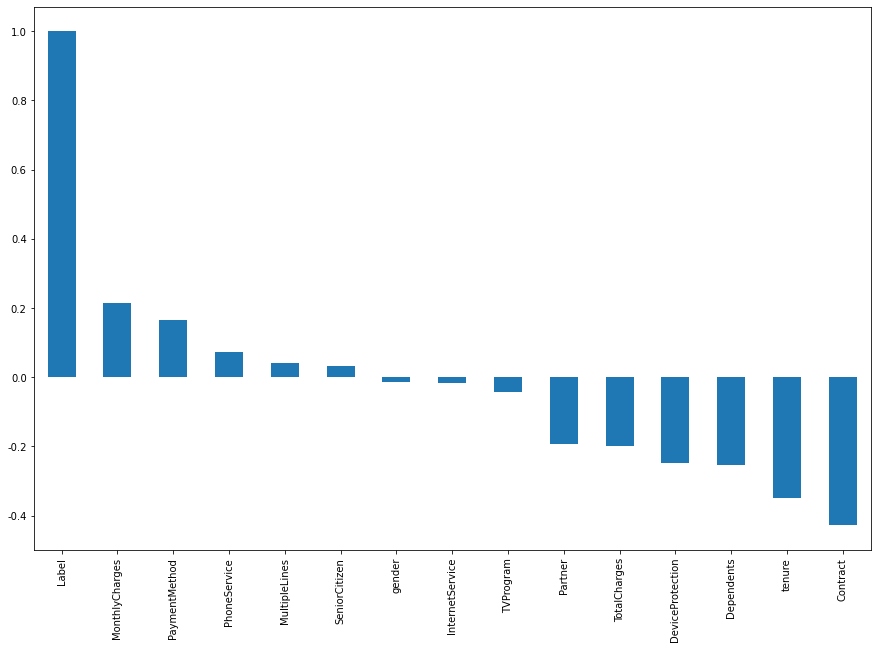

In [ ]:
# 查看单个特征与label的关联性
plt.rcParams['axes.unicode_minus']=False # 显示负号
plt.figure(figsize=(15,10))
data_dummy.corr()['Label'].sort_values(ascending=False).plot(kind='bar')

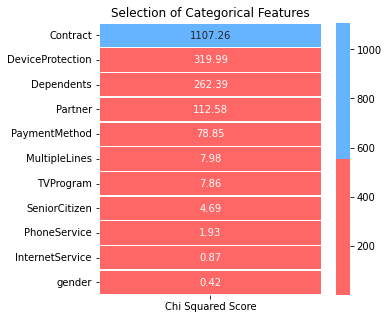

In [ ]:
categorical_features=['gender', 'SeniorCitizen', 'Partner',
                      'Dependents', 'PhoneService', 'MultipleLines',
                      'InternetService', 'DeviceProtection','TVProgram','Contract','PaymentMethod']
features = data.loc[:,categorical_features]
target = data.loc[:,'Label']
best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)
featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,fmt = '.2f');
plt.title('Selection of Categorical Features');

Text(0.5, 1.0, 'Selection of Numerical Features')

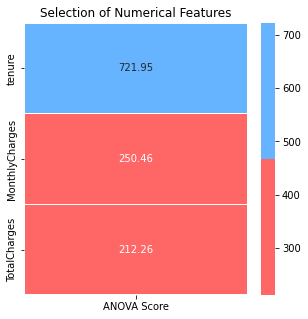

In [ ]:
features = data.loc[:,numerical_features]
target = data.loc[:,'Label']
best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)
featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,fmt = '.2f');
plt.title('Selection of Numerical Features')


In [ ]:
# data_dummy.drop(columns = ['PhoneService', 'gender','MultipleLines','InternetService','TVProgram','SeniorCitizen'],inplace = True)
# data_dummy.head()

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
# over = SMOTE(sampling_strategy = 1)
# f1 = data_dummy.iloc[:,:17].values  #这里的列数要记得修改！！
# t1 = data_dummy.iloc[:,17].values
# f1, t1 = over.fit_resample(f1, t1)
# Counter(t1)

In [ ]:
train

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure,Label
0,0,One year,No,No internet service,No,0.058794,Yes,Yes,Bank transfer (automatic),Yes,0,No internet service,0.174012,Male,0.833333,No
1,1,Month-to-month,No,No,Fiber optic,0.576904,Yes,No,Electronic check,Yes,0,No,0.108564,Female,0.166667,Yes
2,2,Month-to-month,Yes,No internet service,No,0.079223,Yes,Yes,Electronic check,Yes,0,No internet service,0.123883,Female,0.555556,No
3,3,Two year,Yes,No internet service,No,0.063777,Yes,Yes,Bank transfer (automatic),Yes,0,No internet service,0.131056,Female,0.625000,No
4,4,Month-to-month,Yes,No internet service,No,0.008969,No,Yes,Mailed check,Yes,0,No internet service,0.053686,Male,0.347222,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5222,5222,One year,No,No internet service,No,0.024913,No,Yes,Electronic check,Yes,1,No internet service,0.054576,Male,0.319444,No
5223,5223,Month-to-month,No,No internet service,No,0.016442,No,No,Mailed check,Yes,0,No internet service,0.000129,Female,0.013889,Yes
5224,5224,Two year,Yes,Yes,Fiber optic,0.931739,Yes,Yes,Credit card (automatic),Yes,0,Yes,0.876731,Female,0.944444,No
5225,5225,One year,Yes,Yes,DSL,0.598904,Yes,Yes,Credit card (automatic),Yes,0,Yes,0.373557,Female,0.569444,No


In [ ]:
data = train.drop(['ID','Label'],   # gender,SeniorCitizen等六项在特征选择步骤中去除'PhoneService', 'gender','MultipleLines','InternetService','TVProgram','SeniorCitizen'
                    axis=1)  # 去除相关性不大、特征不明显的属性
print(data)
data_dummy = pd.get_dummies(data)  # onehot编码，常用与把离散的类别信息转化为onehot编码形式。
Label_mapDict = {'Yes': 1, 'No': 0}
data_dummy['Label'] = train['Label'].map(Label_mapDict)
print(data_dummy)

            Contract Dependents     DeviceProtection InternetService  \
0           One year         No  No internet service              No   
1     Month-to-month         No                   No     Fiber optic   
2     Month-to-month        Yes  No internet service              No   
3           Two year        Yes  No internet service              No   
4     Month-to-month        Yes  No internet service              No   
...              ...        ...                  ...             ...   
5222        One year         No  No internet service              No   
5223  Month-to-month         No  No internet service              No   
5224        Two year        Yes                  Yes     Fiber optic   
5225        One year        Yes                  Yes             DSL   
5226  Month-to-month        Yes                  Yes     Fiber optic   

      MonthlyCharges MultipleLines Partner              PaymentMethod  \
0           0.058794           Yes     Yes  Bank transfer (aut

In [ ]:
over = SMOTE(sampling_strategy = 1)
f1 = data_dummy.iloc[:,:31].values  #这里的列数要记得修改！！
t1 = data_dummy.iloc[:,31].values
#f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 3280, 1: 1947})

In [ ]:
print(len(f1[1]))

31


In [ ]:
X_train = f1
y_train = t1
print(X_train.shape)

(5227, 31)


In [ ]:
# 导入模型
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.svm import SVC                         # 支持向量机
from sklearn.tree import DecisionTreeClassifier     # 决策树
from sklearn.ensemble import RandomForestClassifier # 随机森林
from sklearn.ensemble import GradientBoostingClassifier # GBDT
from sklearn.ensemble import AdaBoostClassifier     # AdaBoost
from xgboost.sklearn import XGBClassifier           # xgboost
from lightgbm.sklearn import LGBMClassifier         # lightgbm
from sklearn.ensemble import StackingClassifier # 模型stacking融合
from sklearn.ensemble import VotingClassifier # voting融合

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score

In [ ]:
data


,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure
0,One year,No,No internet service,No,0.058794,Yes,Yes,Bank transfer (automatic),Yes,0,No internet service,0.174012,Male,0.833333
1,Month-to-month,No,No,Fiber optic,0.576904,Yes,No,Electronic check,Yes,0,No,0.108564,Female,0.166667
2,Month-to-month,Yes,No internet service,No,0.079223,Yes,Yes,Electronic check,Yes,0,No internet service,0.123883,Female,0.555556
3,Two year,Yes,No internet service,No,0.063777,Yes,Yes,Bank transfer (automatic),Yes,0,No internet service,0.131056,Female,0.625000
4,Month-to-month,Yes,No internet service,No,0.008969,No,Yes,Mailed check,Yes,0,No internet service,0.053686,Male,0.347222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5222,One year,No,No internet service,No,0.024913,No,Yes,Electronic check,Yes,1,No internet service,0.054576,Male,0.319444
5223,Month-to-month,No,No internet service,No,0.016442,No,No,Mailed check,Yes,0,No internet service,0.000129,Female,0.013889
5224,Two year,Yes,Yes,Fiber optic,0.931739,Yes,Yes,Credit card (automatic),Yes,0,Yes,0.876731,Female,0.944444
5225,One year,Yes,Yes,DSL,0.598904,Yes,Yes,Credit card (automatic),Yes,0,Yes,0.373557,Female,0.569444


In [ ]:
# X_train=data.drop('Label',axis=1)
# y_train=data['Label'].map({'Yes': 1, 'No': 0})

In [ ]:
# 网格搜索+交叉验证
def check_model(X_train, y_train, clf, clf_name, parameters, k_fold, metrics='accuracy'):
    # 管道机制使得参数集在新数据集（比如测试集）上的重复使用，管道机制实现了对全部步骤的流式化封装和管理。
    pipeline = Pipeline([(clf_name, clf)])
    # k折采样
    # folder = KFold(n_splits=k_fold, shuffle=True)
    # 分层k折采样
    folder = StratifiedKFold(n_splits=k_fold, shuffle=True)
    # 网格搜索
    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=parameters,
                               cv=folder,
                               scoring=metrics)
    gs = grid_search.fit(X_train, y_train)
    print('GridSearch 最优参数：{}，最优分数：{}'.format(gs.best_params_, gs.best_score_))
    return gs

In [ ]:
num_folds = 5
import lightgbm as lgb

lgb_params = {    
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric': 'accuracy',
          'nthread':4,
          'learning_rate':0.1,
          'num_leaves':30, 
          'max_depth': 5,   
          'subsample': 0.8, 
          'colsample_bytree': 0.8, 
    }

data_train = lgb.Dataset(X_train, y_train, silent=True)
cv_results = lgb.cv(lgb_params, data_train, num_boost_round=1000, nfold=5, stratified=False, shuffle=True, metrics='auc',early_stopping_rounds=50,seed=0)
print('best n_estimators:', len(cv_results['auc-mean']))
print('best cv score:', pd.Series(cv_results['auc-mean']).max())

KeyboardInterrupt: ignored

In [ ]:
# lightgbm
num_folds = 5
lgb = LGBMClassifier(max_depth=6,num_leaves=15,max_bin=55,min_data_in_leaf=11,feature_fraction=0.9,
                     bagging_fraction=0.8,bagging_freq=60,
          objective='binary',
          metric= 'accuracy',
          learning_rate=0.03
          )
lgb_parameters = {
                  #'lgb__max_depth': range(4, 10),
                  #'lgb__num_leaves': range(5, 100, 5),
                  #'lgb__max_bin': range(5, 256, 10), 
                  #'lgb__min_data_in_leaf': range(1, 102, 10),
                  # 'lgb__feature_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
                  # 'lgb__bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
                  # 'lgb__bagging_freq': range(0, 81, 10),
                  #'lgb__feature_fraction': [0.7,0.8],
                  #'lgb__bagging_fraction': [0.9,0.8],
                  #'lgb__bagging_freq':[70,80],
                  'lgb__lambda_l1': [1e-5, 1e-3, 1e-1, 0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
                  'lgb__lambda_l2': [1e-5, 1e-3, 1e-1, 0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
                  'lgb__min_split_gain': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
                  }
lgb_model = check_model(X_train, y_train, lgb, 'lgb', lgb_parameters, num_folds)

# 在训练集上划分数据进行测试，分一下训练集和验证集
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)
y_pred = lgb_model.predict(X_valid)
print(accuracy_score(y_pred, y_valid))



GridSearch 最优参数：{'lgb__lambda_l1': 0.3, 'lgb__lambda_l2': 1e-05, 'lgb__min_split_gain': 0.2}，最优分数：0.7784613977146935
0.768642447418738


In [ ]:
# xgboost
import xgboost as xgb
def tun_parameters(train_x,train_y):  #通过这个函数，确定树的个数
    xgb1 = XGBClassifier(learning_rate=0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,  
                         colsample_bytree=0.8,objective= 'binary:logistic',scale_pos_weight=1,seed=27)  
    modelfit(xgb1,train_x,train_y)  
 
def modelfit(alg,X, y,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X, label=y)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
 
    #Fit the algorithm on the data
    alg.fit(X, y,eval_metric='auc')
 
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
 
    print(accuracy_score(y, dtrain_predictions))

    print('n_estimators=',cvresult.shape[0])
tun_parameters(X_train,y_train)


0.8007653671370486
n_estimators= 30


In [ ]:
param_test1 = {
 'max_depth':range(3,10,1),
 'min_child_weight':range(1,6,1)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=35, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8,colsample_bytree=0.8,\
 objective= 'binary:logistic', nthread=8,scale_pos_weight=1, seed=27), 
 param_grid = param_test1,scoring='accuracy',n_jobs=-1, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_,gsearch1.best_score_

({'max_depth': 6, 'min_child_weight': 3}, 0.7815221349044434)

In [ ]:
param_test3 = {  
    'gamma': [i / 10.0 for i in range(0, 5)]  
}  
gsearch3 = GridSearchCV(  
    estimator=XGBClassifier(learning_rate=0.1, n_estimators=35, max_depth=6, min_child_weight=3, gamma=0,  
                            subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=8,  
                            scale_pos_weight=1, seed=27), param_grid=param_test3, scoring='accuracy', n_jobs=-1,cv=5)  
gsearch3.fit(X_train,y_train)  
gsearch3.best_params_, gsearch3.best_score_  

({'gamma': 0.0}, 0.7815221349044434)

In [ ]:
param_test4 = {  
    'subsample': [i / 10.0 for i in range(6, 10)],  
    'colsample_bytree': [i / 10.0 for i in range(6, 10)]  
}  
  
gsearch4 = GridSearchCV(  
    estimator=XGBClassifier(learning_rate=0.1, n_estimators=35, max_depth=6, min_child_weight=3, gamma=0.0,  
                            subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=8,  
                            scale_pos_weight=1, seed=27), param_grid=param_test4, scoring='accuracy', n_jobs=-1,cv=5)  
  
gsearch4.fit(X_train,y_train)  
gsearch4.best_params_, gsearch4.best_score_  

({'colsample_bytree': 0.8, 'subsample': 0.8}, 0.7815221349044434)

In [ ]:
param_test6 = {  
 'reg_alpha':[1e-5,1e-4,1e-3, 1e-2, 0.1, 1, 100],
 'reg_lambda':[1e-5,1e-4,1e-3, 1e-2, 0.1, 1, 100] 
}  
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=35, max_depth=6, min_child_weight=3, 
    gamma=0.0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=8, 
    scale_pos_weight=1,seed=27), param_grid = param_test6, scoring='accuracy',n_jobs=-1,cv=5)  
gsearch6.fit(X_train,y_train)  
gsearch6.best_params_, gsearch6.best_score_ 

({'reg_alpha': 0.001, 'reg_lambda': 1}, 0.781713522464252)

In [ ]:
def tun_parameters2(train_x,train_y):  #通过这个函数，确定树的个数
    xgb1 = XGBClassifier(learning_rate =0.01, n_estimators=66, max_depth=6, min_child_weight=3, 
    gamma=0.0, subsample=0.8, colsample_bytree=0.8,reg_alpha= 0.001,reg_lambda=1, objective= 'binary:logistic', nthread=8,
    scale_pos_weight=1,seed=27)
    modelfit(xgb1,train_x,train_y)  
tun_parameters2(X_train,y_train)

0.8017220760583592
n_estimators= 66


In [ ]:
# GBDT
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='accuracy',cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 40}, 0.7780778907114824)

In [ ]:
param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(100,801,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=40, min_samples_leaf=20, 
      max_features='sqrt', subsample=0.8, random_state=10), 
   param_grid = param_test2, scoring='accuracy', cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 7, 'min_samples_split': 100}, 0.7784608488019981)

In [ ]:
param_test3 = {'min_samples_split':range(800,1900,200), 'min_samples_leaf':range(60,101,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=40,max_depth=7,
                                     max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='accuracy',cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 70, 'min_samples_split': 800}, 0.7669808886896539)

In [ ]:
gbm1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=40,max_depth=7, min_samples_leaf =70, 
               min_samples_split =800, max_features='sqrt', subsample=0.8, random_state=10)
gbm1.fit(X_train,y_train)
y_pred = gbm1.predict(X_train)
y_predprob = gbm1.predict_proba(X_train)[:,1]
print(accuracy_score(y_train, y_pred))

0.7755882915630381


In [ ]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=40,max_depth=7, min_samples_leaf =70, 
               min_samples_split =800, subsample=0.8, random_state=10), 
                       param_grid = param_test4, scoring='accuracy', cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 11}, 0.7713822536525565)

In [ ]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=40,max_depth=7, min_samples_leaf =70, 
               min_samples_split =800, max_features=11, random_state=10), 
                       param_grid = param_test5, scoring='accuracy',cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

({'subsample': 0.85}, 0.7738684622210837)

In [ ]:
gbm2 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=1200,max_depth=7, min_samples_leaf =70, 
               min_samples_split =800, max_features=11, subsample=0.85, random_state=10)
gbm2.fit(X_train,y_train)
y_pred = gbm2.predict(X_train)
y_predprob = gbm2.predict_proba(X_train)[:,1]
print(accuracy_score(y_train, y_pred))

0.8448440788215037


In [ ]:
# random forest
param_test1 = {'n_estimators':list(range(10,81,10))}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(oob_score=True,random_state=33), 
                       param_grid = param_test1, scoring='accuracy',cv=5,n_jobs=-1)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 80}, 0.740004574272462)

In [ ]:
param_test2 = {'max_depth':list(range(1,14,2)), 'min_samples_split':list(range(50,201,20))}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 80, oob_score=True, random_state=33),
   param_grid = param_test2, scoring='accuracy', cv=5,n_jobs=-1)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 13, 'min_samples_split': 50}, 0.781330381402838)

In [ ]:
rf1 = RandomForestClassifier(n_estimators= 80, max_depth=13, min_samples_split=50,oob_score=True, random_state=33)
rf1.fit(X_train,y_train)
print(rf1.oob_score_)

0.7771188061985843


In [ ]:
param_test3 = {'min_samples_split':list(range(10,150,5)), 'min_samples_leaf':list(range(1,50,1))}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 80, max_depth=13,oob_score=True, min_samples_split=50,random_state=33),
param_grid = param_test3, scoring='accuracy',cv=5,n_jobs=-1)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 4, 'min_samples_split': 45}, 0.7830515886448259)

In [ ]:
param_test4 = {'max_features':list(range(3,31,2))}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 80, max_depth=13, min_samples_split=25,min_samples_leaf=6,oob_score=True, random_state=33),
   param_grid = param_test4, scoring='accuracy', cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 5}, 0.779991217396873)

In [ ]:
rf1 = RandomForestClassifier(n_estimators= 80, max_depth=13, min_samples_split=25,min_samples_leaf=6,max_features=5,oob_score=True, random_state=33)
rf1.fit(X_train,y_train)
print(rf1.oob_score_)


0.7761622345513679


In [ ]:
# ADABOOST
#Adaboost调参
#adaboost有自己的参数，他的base_estimator指向一个弱学习器，这个弱学习器也包含自己的参数
#为了使用GridSearchCV我们需要使用嵌套参数。在sklearn中我们使用双下划线表示"__"
param_grid = {"base_estimator__criterion": ["gini", "entropy"],
              "base_estimator__splitter": ["best", "random"],
              "base_estimator__max_depth": range(1,5),
              "n_estimators": [10,30,50,70,90,100]}
dtc = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=dtc)
grid_search = GridSearchCV(ada, param_grid=param_grid, cv=5, scoring='accuracy' ) #5折交叉
grid_search.fit(X_train,y_train)
print( 'Best params in Adaboost:', grid_search.best_params_, grid_search.best_score_ )


Best params in Adaboost: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 1, 'base_estimator__splitter': 'random', 'n_estimators': 90} 0.7731045587199357


In [ ]:
#利用Adaboost预测拆分的test
ada = AdaBoostClassifier(DecisionTreeClassifier( criterion='entropy',
                                                  splitter='random',
                                                  max_depth=1),
                         n_estimators=90, random_state=0)

ada.fit(X_train, y_train)
# # 在训练集上划分数据进行测试，分一下训练集和验证集
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)
# y_pred = ada.predict(X_valid)
# print(accuracy_score(y_pred, y_valid))


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1,
                                                         splitter='random'),
                   n_estimators=90, random_state=0)

In [ ]:
#SVM
grid = GridSearchCV(SVC(), param_grid={"C":[0.1, 1, 10], "gamma": [1, 0.1, 0.01]}, cv=5)
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'C': 10, 'gamma': 0.01}, 0.7593457943925233)

In [ ]:
svc_model = SVC(random_state = 1,C=10,gamma=0.01)
svc_model.fit(X_train,y_train)
# # 在训练集上划分数据进行测试，分一下训练集和验证集
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)
# y_pred = svc_model.predict(X_valid)
# print(accuracy_score(y_pred, y_valid))

SVC(C=10, gamma=0.01, random_state=1)

In [ ]:
# 逻辑回归
grid = GridSearchCV(LogisticRegression(), param_grid=[{
        'C':  [0.0001,0.001,0.01,0.1,1,10],
        'penalty': ['l2'],
        'tol': [1e-4,1e-5,1e-6]
    },
    {
        'C':  [0.0001,0.001,0.01,0.1,1,10],
        'penalty': ['l1'],
        'tol': [1e-4,1e-5,1e-6]
    }]
, cv=5)
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'C': 10, 'penalty': 'l2', 'tol': 0.0001}, 0.7618176329054863)

In [ ]:
lin=LogisticRegression(C=10,penalty='l2',tol=0.0001)
lin.fit(X_train,y_train)
# 在训练集上划分数据进行测试，分一下训练集和验证集
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)
# y_pred = lin.predict(X_valid)
# print(accuracy_score(y_pred, y_valid))

LogisticRegression(C=10)

In [ ]:
#训练函数
import numpy as np
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 5,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'accuracy').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Negative','False Positive','False Negative','True Positive']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [ ]:
#将上面训练的模型带入画图：

#从将样本数据按照80:20的比例划分为训练数据和测试数据
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)



Cross Validation Score :  77.09%
ROC_AUC Score :  76.13%


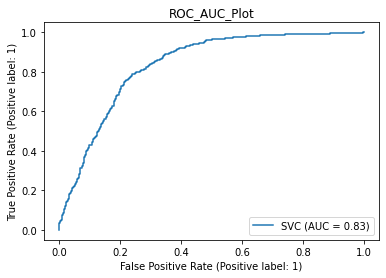

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       658
           1       0.68      0.73      0.70       388

    accuracy                           0.77      1046
   macro avg       0.75      0.76      0.76      1046
weighted avg       0.77      0.77      0.77      1046



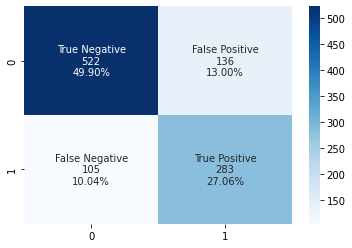

In [ ]:
#SVM
model(svc_model,x_train,y_train,x_test,y_test)
model_evaluation(svc_model,x_test,y_test)

Cross Validation Score :  78.11%
ROC_AUC Score :  75.12%


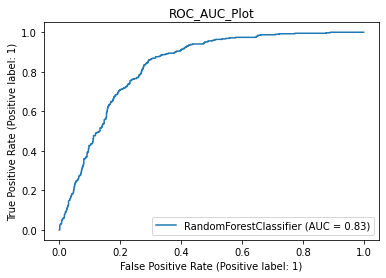

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       658
           1       0.66      0.72      0.69       388

    accuracy                           0.76      1046
   macro avg       0.74      0.75      0.75      1046
weighted avg       0.76      0.76      0.76      1046



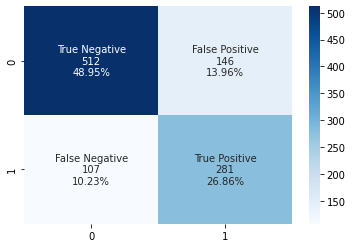

In [ ]:
# 随机森林
model(rf1,x_train,y_train,x_test,y_test)
model_evaluation(rf1,x_test,y_test)

Cross Validation Score :  76.13%
ROC_AUC Score :  75.40%


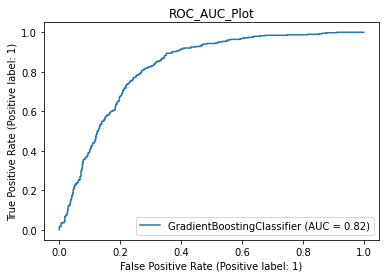

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       658
           1       0.66      0.73      0.69       388

    accuracy                           0.76      1046
   macro avg       0.75      0.75      0.75      1046
weighted avg       0.77      0.76      0.76      1046



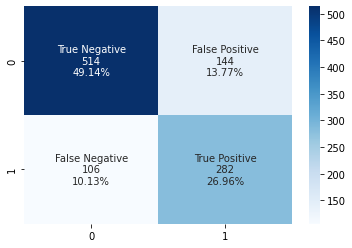

In [ ]:
# GBDT
model(gbm2,x_train,y_train,x_test,y_test)
model_evaluation(gbm2,x_test,y_test)

Cross Validation Score :  77.15%
ROC_AUC Score :  75.72%


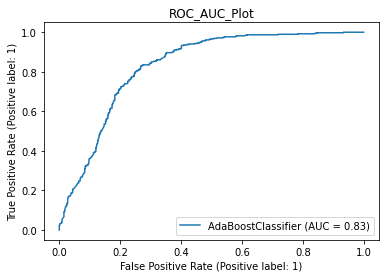

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       658
           1       0.68      0.72      0.70       388

    accuracy                           0.77      1046
   macro avg       0.75      0.76      0.75      1046
weighted avg       0.77      0.77      0.77      1046



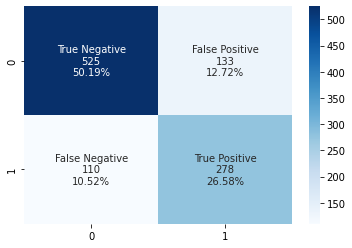

In [ ]:
# adaboost
model(ada,x_train,y_train,x_test,y_test)
model_evaluation(ada,x_test,y_test)

Cross Validation Score :  77.62%
ROC_AUC Score :  76.58%


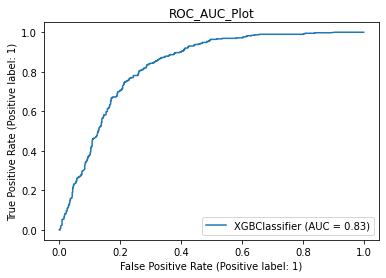

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       658
           1       0.67      0.75      0.71       388

    accuracy                           0.77      1046
   macro avg       0.76      0.77      0.76      1046
weighted avg       0.78      0.77      0.77      1046



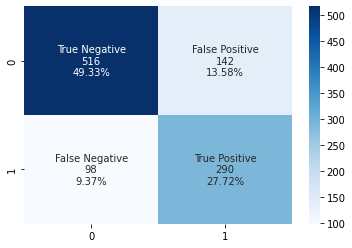

In [ ]:
# xgboost
xgb1 = XGBClassifier(learning_rate =0.01, n_estimators=66, max_depth=6, min_child_weight=3, 
    gamma=0.0, subsample=0.8, colsample_bytree=0.8,reg_alpha= 0.001,reg_lambda=1, objective= 'binary:logistic', nthread=8,
    scale_pos_weight=1,seed=27)
model(xgb1,x_train,y_train,x_test,y_test)
model_evaluation(xgb1,x_test,y_test)

Cross Validation Score :  77.34%
ROC_AUC Score :  76.23%


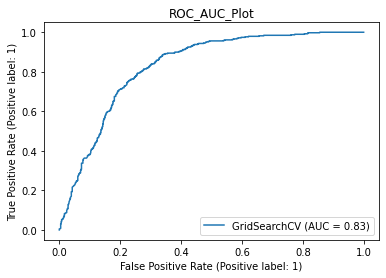

              precision    recall  f1-score   support

           0       0.84      0.77      0.81       658
           1       0.66      0.75      0.70       388

    accuracy                           0.76      1046
   macro avg       0.75      0.76      0.75      1046
weighted avg       0.77      0.76      0.77      1046



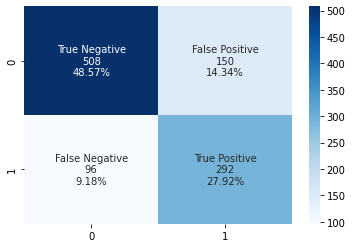

In [ ]:
# lightgbm
model(lgb_model,x_train,y_train,x_test,y_test)
model_evaluation(lgb_model,x_test,y_test)

Cross Validation Score :  77.78%
ROC_AUC Score :  75.48%


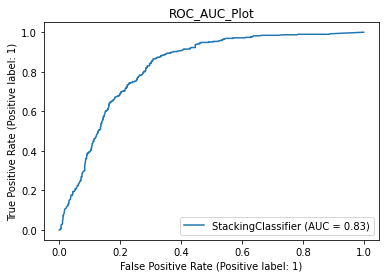

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       658
           1       0.66      0.73      0.69       388

    accuracy                           0.76      1046
   macro avg       0.75      0.75      0.75      1046
weighted avg       0.77      0.76      0.76      1046



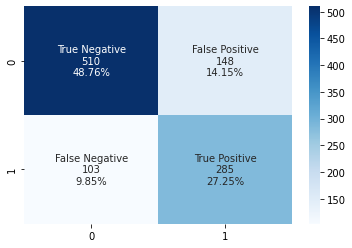

In [ ]:
# stacking模型融合1
xgb1 = XGBClassifier(learning_rate =0.01, n_estimators=66, max_depth=6, min_child_weight=3, 
    gamma=0.0, subsample=0.8, colsample_bytree=0.8,reg_alpha= 0.001,reg_lambda=1, objective= 'binary:logistic', nthread=8,
    scale_pos_weight=1,seed=27)
lgb = LGBMClassifier(max_depth=6,num_leaves=15,max_bin=55,min_data_in_leaf=11,feature_fraction=0.9,
                     bagging_fraction=0.8,bagging_freq=60,lambda_l1=0.3, lambda_l2= 1e-05, min_spit_gain= 0.2,
          objective='binary',
          metric= 'accuracy',
          learning_rate=0.03
          )
stack = StackingClassifier(estimators = [('classifier_xgb',xgb1),
                                         ('classifier_gbdt',gbm2),
                                         ('classifier_rf',rf1),
                                         ('classifier_lgb',lgb)],
                           final_estimator =lgb )
model(stack,x_train,y_train,x_test,y_test)
model_evaluation(stack,x_test,y_test)

Cross Validation Score :  77.83%
ROC_AUC Score :  75.06%


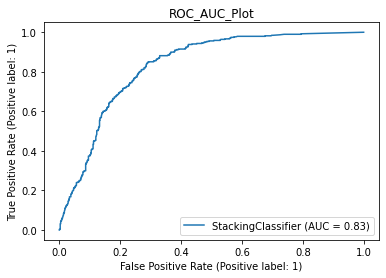

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       658
           1       0.66      0.72      0.69       388

    accuracy                           0.76      1046
   macro avg       0.74      0.75      0.75      1046
weighted avg       0.76      0.76      0.76      1046



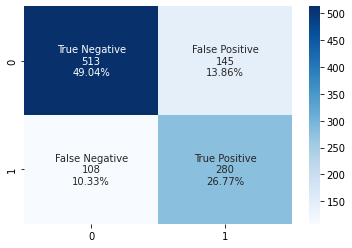

In [ ]:
# stacking模型融合2
xgb1 = XGBClassifier(learning_rate =0.01, n_estimators=66, max_depth=6, min_child_weight=3, 
    gamma=0.0, subsample=0.8, colsample_bytree=0.8,reg_alpha= 0.001,reg_lambda=1, objective= 'binary:logistic', nthread=8,
    scale_pos_weight=1,seed=27)
lgb = LGBMClassifier(max_depth=6,num_leaves=15,max_bin=55,min_data_in_leaf=11,feature_fraction=0.9,
                     bagging_fraction=0.8,bagging_freq=60,lambda_l1=0.3, lambda_l2= 1e-05, min_spit_gain= 0.2,
          objective='binary',
          metric= 'accuracy',
          learning_rate=0.03
          )
stack2 = StackingClassifier(estimators = [('classifier_xgb',xgb1),
                                         ('classifier_gbdt',gbm2),
                                         ('classifier_rf',rf1),
                                         ('classifier_lgb',lgb)],
                           final_estimator =xgb1)
model(stack2,x_train,y_train,x_test,y_test)
model_evaluation(stack2,x_test,y_test)

Cross Validation Score :  77.66%
ROC_AUC Score :  76.07%


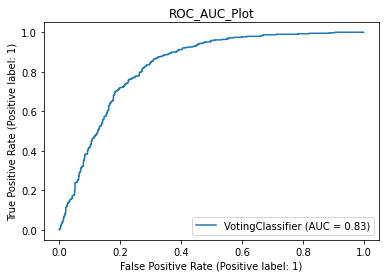

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       658
           1       0.66      0.74      0.70       388

    accuracy                           0.76      1046
   macro avg       0.75      0.76      0.75      1046
weighted avg       0.77      0.76      0.77      1046



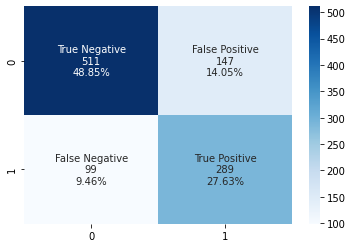

In [ ]:
eclf1 = VotingClassifier(estimators=[('xgb', xgb1), ('gbdt', gbm2), ('rf', rf1),('lgb',lgb_model)], voting='soft')
model(eclf1,x_train,y_train,x_test,y_test)
model_evaluation(eclf1,x_test,y_test)

In [ ]:
submission = test.drop(['ID'], axis=1)
mms = MinMaxScaler() # Normalization
submission['tenure'] = mms.fit_transform(submission[['tenure']])
submission['MonthlyCharges'] = mms.fit_transform(submission[['MonthlyCharges']])
submission['TotalCharges'] = mms.fit_transform(submission[['TotalCharges']])
submission_dummy = pd.get_dummies(submission)
#print(submission_dummy)
over = SMOTE(sampling_strategy = 1)
f2 = submission_dummy.iloc[:,:31].values 

preds = stack2.predict(f2)
predDF = pd.DataFrame()
predDF['ID'] = test['ID']
predDF['Label'] = pd.Series(preds).map({1: 'Yes', 0: 'No'})
output = 'stacking' + '2004_results.csv'
predDF.to_csv(output, index=False)  # 保存为csv文件

In [ ]:
def testPredict(testDF, clf, clfName):
    submission = testDF.drop(['ID'], axis=1) # gender,SeniorCitizen
    submission_dummy = pd.get_dummies(submission)

    preds = clf.predict(submission_dummy)  # 预测
    predDF = pd.DataFrame()
    predDF['ID'] = testDF['ID']
    predDF['Label'] = pd.Series(preds).map({1: 'Yes', 0: 'No'})

    output = clfName + '1802_results.csv'
    predDF.to_csv(output, index=False)  # 保存为csv文件


testPredict(test, lgb_model, 'lgb')

In [ ]:
# 深度学习tensorflow
from tensorflow.python.framework import ops 
ops.reset_default_graph()
import tflearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y=train['Label'].map({'Yes': 1, 'No': 0})
y = y[:, np.newaxis]
onehotencoder = OneHotEncoder()
y = onehotencoder.fit_transform(y).toarray()
print(X_train.shape)

# 输入层：
net = tflearn.input_data(shape=[None,31])
# 隐藏层：三层神经网络
net = tflearn.fully_connected(net, 16, activation='relu')
net = tflearn.fully_connected(net, 16, activation='relu')
net = tflearn.fully_connected(net, 16, activation='relu')
#输出层：
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net)

model = tflearn.DNN(net)

model.fit(X_train, y, n_epoch=30, batch_size=32, show_metric=True)

y_pred = model.predict(X_train)
print(y_pred)

Training Step: 4919  | total loss: 0.47222 | time: 0.536s
| Adam | epoch: 030 | loss: 0.47222 - acc: 0.7743 -- iter: 5216/5227
Training Step: 4920  | total loss: 0.46909 | time: 0.539s
| Adam | epoch: 030 | loss: 0.46909 - acc: 0.7781 -- iter: 5227/5227
--
[[0.9668994  0.03310058]
 [0.29020455 0.7097955 ]
 [0.911201   0.08879908]
 ...
 [0.9477395  0.05226054]
 [0.86543083 0.1345692 ]
 [0.6369843  0.36301574]]


In [ ]:
y_pred = model.predict(X_train)
print(y_pred)

[[0.9668994  0.03310058]
 [0.29020455 0.7097955 ]
 [0.911201   0.08879908]
 ...
 [0.9477395  0.05226054]
 [0.86543083 0.1345692 ]
 [0.6369843  0.36301574]]


In [ ]:
y1_pred=y_pred[:,0]
for i in range(len(y1_pred)):
  if y1_pred[i]<=0.5:
    y1_pred[i]=0
  else:
    y1_pred[i]=1

y1_pred

array([1., 0., 1., ..., 1., 1., 1.], dtype=float32)

In [ ]:
submission = test.drop(['ID'], axis=1)
mms = MinMaxScaler() # Normalization
submission['tenure'] = mms.fit_transform(submission[['tenure']])
submission['MonthlyCharges'] = mms.fit_transform(submission[['MonthlyCharges']])
submission['TotalCharges'] = mms.fit_transform(submission[['TotalCharges']])
submission_dummy = pd.get_dummies(submission)
#print(submission_dummy)
over = SMOTE(sampling_strategy = 1)
f2 = submission_dummy.iloc[:,:31].values 
y_pred = model.predict(f2)
y1_pred=y_pred[:,0]
for i in range(len(y1_pred)):
  if y1_pred[i]<=0.5:
    y1_pred[i]=1
  else:
    y1_pred[i]=0

y1_pred

predDF = pd.DataFrame()
predDF['ID'] = test['ID']
predDF['Label'] = pd.Series(y1_pred).map({1: 'Yes', 0: 'No'})
output = 'dnn' + '1904_results.csv'
predDF.to_csv(output, index=False)  # 保存为csv文件